## Imports

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

# Dataframe Exoneração

In [3]:
files = helper.get_files_path("../data/dodfs_txt_barra_n/")
rets_final = helper.extract_multiple(files, "exoneracao", True, "../results/")
rets_final

,tipo,nome,matricula,simbolo,cargo_comissao,lotacao,orgao,vigencia,pedido,cargo_efetivo,siape,motivo
0,NaN,MATHEUS DE ARAUJO SIQUEIRA,nan,DFG-14,nan,"Diretoria de Acoes para o Trabalhador, da Coor...",Secretaria de Estado de Trabalho do Distrito F...,nan,nan,nan,nan,nan
1,NaN,MARCIO HUMBERTO DA SILVA ROCHA,nan,DFA-10,nan,Agencia de Atendimento ao Trabalhador\nde Sobr...,Secretaria de Estado de Trabalho do Distrito F...,nan,nan,nan,nan,nan
2,NaN,ADAILTON LINO DOS SANTOS,nan,DFG-14,nan,"Diretoria de Acoes para o Trabalhador, da\nCoo...",Secretaria de Estado de Trabalho do\nDistrito ...,nan,nan,nan,nan,nan
3,NaN,BRUNA ESTRELA NUNES,nan,DFG-14,nan,"Diretoria de Acoes para o Trabalhador, da\nCoo...",Secretaria de Estado de Trabalho do\nDistrito ...,nan,nan,nan,nan,nan
4,NaN,IVANUZA ARAUJO FERREIRA DE SOUZA,nan,DFG-14,nan,"Diretoria de Acoes para o\nTrabalhador, da Coo...",Secretaria de Estado de\nTrabalho do Distrito ...,nan,nan,nan,nan,nan
5,NaN,RODRIGO NUNES SANTANA,nan,DFG-14,nan,"Gerencia de Execucao de Obras, da Diretoria de...",Administracao Regional do Park Way do Distrito...,nan,nan,nan,nan,nan
6,NaN,KATIA REGINA DA SILVA CABRAL,nan,DFA-10,nan,Coordenacao Executiva,Administracao\nRegional do Park Way do Distrit...,nan,nan,nan,nan,nan
7,NaN,PEDRO HENRIQUE MONTEIRO DE JESUS,nan,DFA-10,nan,Coordenacao de Administracao Geral,Administracao Regional do Park Way do Distrito...,nan,nan,nan,nan,nan
8,NaN,ROBSON ELIAS SOUSA FERRAZ,nan,DFA-08,nan,Gabinete,Administracao Regional do Park Way do Distrito...,nan,nan,nan,nan,nan
9,NaN,GLAUCILENE ROSA SASSI,nan,DFG-14,nan,"Gerencia de Administracao, da Coordenacao de A...",Administracao\nRegional do Park Way do Distrit...,nan,a pedido,nan,nan,nan


# Análise

In [4]:
def attribute_stats(name, rets_final):
    presence_name = rets_final[name].value_counts()
    total = rets_final.count()
    labels = ["Com " + name, "Sem " + name]
    size = [total[name] - presence_name[0], presence_name[0]]
    return size, labels

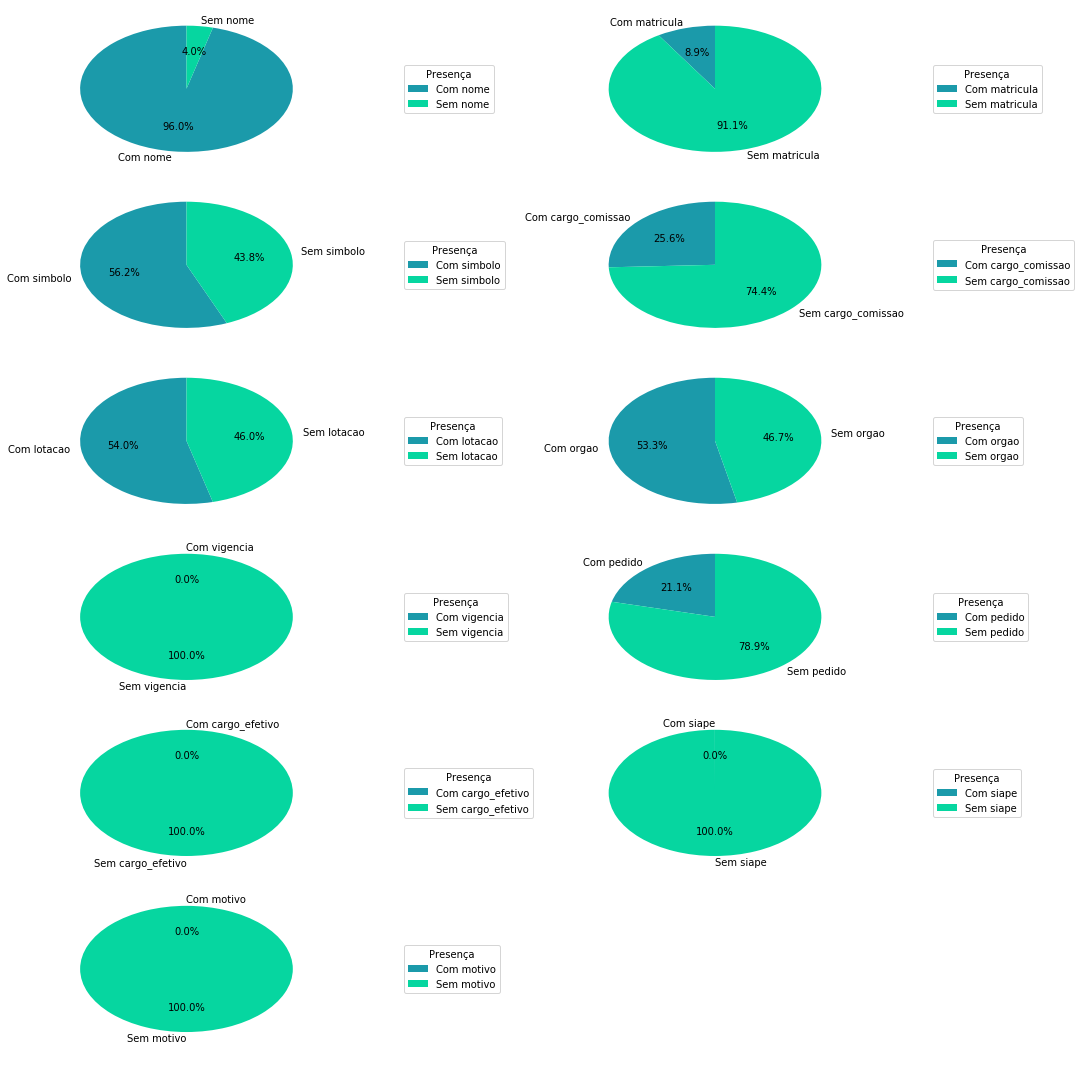

In [5]:

cor = ['#1b9aaa', '#06d6a0']
numb_attr = rets_final.shape[1]-1
grid_square = math.ceil(numb_attr/2)
grid_square = int(grid_square)

_, ax = plt.subplots(grid_square, 2, figsize=(15,15))
names = rets_final.columns[1:]
for i in range(grid_square*2):
    if i < numb_attr:
        size, labels = attribute_stats(names[i], rets_final)
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
    else:
        ax[math.floor(i/2), i%2].axis('off')

plt.tight_layout()
plt.show()